# **0. 참고자료**
## **0-1. 도서**
   - 한빛 미디어 | 오를레앙 제롱 저, 박해선 역 - 핸즈온 머신러닝

## **0-2. 논문, 학술지**

## **0-3. 웹사이트**
- 지미뉴트론 개발일기 - [Pandas] 파이썬 데이터프레임 값 변경 / 대체 방법 정리 | [[블로그 링크]](https://jimmy-ai.tistory.com/245)  
- 아무튼 워라밸 - 다중선형회귀(Multiple Linear Regression) - 파이썬 코드 예제 | [[블로그 링크]](https://hleecaster.com/ml-multiple-linear-regression-example/)
- @_@.... - Scikit-learn(사이킷런)으로 선형회귀 | [[블로그 링크]](https://dprdmr.tistory.com/30)

## **0-4. 데이터셋 출처**



# **1. 선형 회귀 (Linear Regression)**
- 선형 회귀 모델은 연속값을 취하는 종속변수와 독립변수의 선형관계를 모델화 한것.  
<span style="color:red"><b>! 선형관계는 독립변수가 증가(감소)함에 따라, 종속변수도 단조 증가(감소)하는 관계를 말함</b></span>
- 독립변수가 하나인 경우에 선형모델은 아래의 식으로 정의된다.  
$ y = w_{0} + w_{1}x $  
- 독립변수가 여러개인 경우에는 아래의 식으로 정의된다.  
$y = w_{0} + w_{1}x_{1} + ... +w_{n}x_{n} = w_{0} + \displaystyle\sum^n_{i=1}w_{i}x_{i}$  
- $ w_{0} $은 절편(편향), $ w_{i} (1 \leq i \leq n) $은 가중치를 나타낸다.  
- 선형 회귀 모델은 종속변수와 여러개의 독립변수의 관계를 나타내는 모델의 중첩을 학습하는 것이 목적이다.  
<span style="color:red"><b>! 신경망을 구성하는 퍼셉트론의 식과 동일 하다.</b></span>  

## **1-1. 간단한 선형 모델 만들기**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
## 데이터 셋 불러오기
boston = load_boston()

data_frame         = pd.DataFrame(boston.data, columns = boston.feature_names)
data_frame['MEDV'] = boston.target 

data_frame.head()

/opt/conda/envs/bio/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 각 데이터별 특징은 다음과 같다. 
|변수|설명|
|:--:|:--:|
|CRIM|범죄 발생률|
|ZN|25,000 평방 피트 이상의 주택 구역 비율|
|INDUS|비소매업종의 토지면적 비율|
|CHAS|찰스 강변인가를 나타내는 더미 변수|
|NOX|질소 산화물 농도|
|RM|평균 방(room) 개수|
|AGE|1940년 이전에 지어진 건물 비율|
|DIS|다섯개의 보스턴 고용시설으로의 거리|
|RAD|고속도로 접근 용이성|
|TAX|10,000 달러당 부동산 세율|
|PTRATIO|학생과 교사 비율|
|B|흑인 비율|
|LSTAT|저소득자 비율|
|MEDV|주택 가격의 중앙값 (단위 1,000)|

- RM과 MEDV의 상관관계를 구하여 평균 방 개수와 주택 가격이 어느정도 연관성을 가지는지 파악한다.

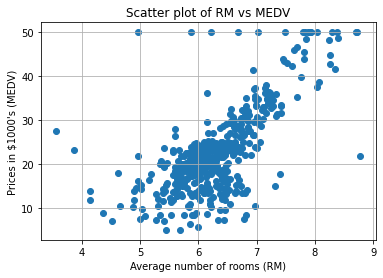

In [4]:
## 평균 방 개수와 주택가격의 산포도
plt.scatter(data_frame['RM'], data_frame['MEDV'])
plt.title('Scatter plot of RM vs MEDV')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('Prices in $1000\'s (MEDV)')
plt.grid()

In [5]:
## RM과 MEDV의 상관관계 계산
## 약 0.7정도로 양의 상관관계를 지니고 있다.

corr_df = data_frame[['RM', 'MEDV']]
corr_df.corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = data_frame[['RM']].values
y = data_frame['MEDV'].values
model.fit(x, y)

## 독립변수 (방의 갯수)의 계수는 약 9.1, 편향은 약 -34.7로 도출
print('독립변수의 계수 | ', model.coef_[0])
print('편향           | ', model.intercept_)

독립변수의 계수 |  9.10210898118031
편향           |  -34.67062077643857


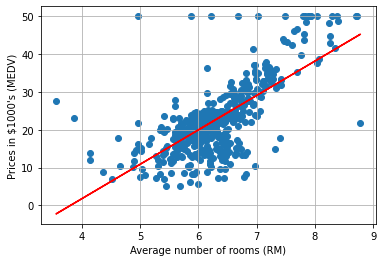

In [7]:
plt.scatter(x, y)

## 회귀직선 그리기
plt.plot(x, model.predict(x), color = 'red')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('Prices in $1000\'s (MEDV)')
plt.grid()

## **1-6. 선형회귀 모델 성능 평가**
- 학습으로 얻어낸 선형 모델의 성능을 평가하기 위해 학습 : 시험 데이터셋 비율을 7 : 3으로 분할  
- 선형모델이 종속변수를 완벽하게 예측가능한 상황은 잔차가 0이 되는 것으로, 예측 정밀도가 좋은 선형 모델의 잔차 그래프는 0을 중심으로 랜덤하게 흩어진다.  
- 잔차 그래프에서 무언가 패턴을 보이는 경우는 선형 모델에서 설명할 수 없는 정보가 있다는 것을 시사 

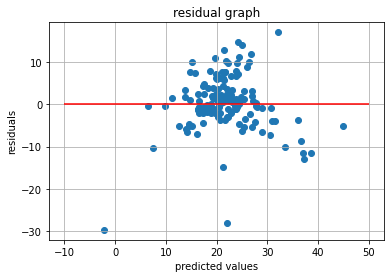

In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

model.fit(train_x, train_y)

pred_y = model.predict(test_x)

## 잔차 구하기
residual = pred_y - test_y
plt.scatter(pred_y, residual)
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'red')

## 잔차 그래프를 그려본 결과 0을 중심으로 대체로 분포하고 있지만, 이상치도 있음을 보임. 
plt.title('residual graph')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.grid()

 - 모델이 얼마나 좋은지 측정하는 <span style="color: orange"><b>효용 함수(Utility function / 적합도 함수 fitness function)</b></span>을 정의하거나  
  얼마나 나쁜지 측정하는 <span style="color: orange"><b>비용 함수(Cost function)</b></span>을 정의할 수 있다.
- <span style="color: orange"><b>MSE(Mean Squared Error)</b></span>는 모델의 성능을 수치화하는 비용함수의 일종이다.   
- 오차가 작으면, 모델 성능이 좋음을 보인다.  
$ Mean Squared Error = \frac{1}{N}\displaystyle\sum_{i=0}^N(y_{i} - \hat y_{i})^2 $

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

train_pred, test_pred = model.predict(train_x), model.predict(test_x)
print(f'학습 데이터 MSE : {mean_squared_error(train_y, train_pred):.3f}')
print(f'시험 데이터 MSE : {mean_squared_error(test_y, test_pred):.3f}')

학습 데이터 MSE : 45.013
시험 데이터 MSE : 40.351


- <span style="color: orange"><b>결정 계수(Coefficient of Determination)</b></span>은 선형 모델의 예측오차를 반영한 지표이다.  
- 0 ~ 1 사이의 값을 가지며 값이 클수록 선형 모델이 데이터에 적합하다고 할 수 있다.  
$
    R^2 = 1 - \frac{SSE}{SST} \\
    \quad = 1 - \frac{\frac{1}{N}\displaystyle\sum_{i=1}^N(y_{i} - \hat y_{i})^2}{\frac{1}{N}\displaystyle\sum_{i=1}^N(y_{i} - \mu_{i})^2} \\
    \quad = 1 - \frac{MSE}{Var(y)}
$

In [11]:
print(f'학습 데이터 결정 계수 : {r2_score(train_y, train_pred):.3f}')
print(f'시험 데이터 결정 계수 : {r2_score(test_y, test_pred):.3f}')

학습 데이터 결정 계수 : 0.488
시험 데이터 결정 계수 : 0.458
